In [1]:
import requests
import pandas as pd

In [2]:
df = pd.read_csv('geo_sampling/bangkok-roads-s1k.csv')
#df = df.sample(10)

In [3]:
API_KEY = 'GOOGLE_MAPS_API_KEY'

## Get Google Maps Street View metadata

In [4]:
def gsv_metadata(lat, lon):
    data = {'key': API_KEY,
                'location':  '{0:f},{1:f}'.format(lat, lon)}
    r = requests.get('https://maps.googleapis.com/maps/api/streetview/metadata', params=data)
    if r.status_code == 200:
        return r.json()
    else:
        print("WARN: No metadata for {0:f},{1:f}".format(lat, lon))
        return None

In [5]:
df['gsv_metadata'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_metadata(r.start_lat, r.start_long), axis=1)

In [6]:
mdf = pd.concat([df, df.gsv_metadata.apply(pd.Series)], axis=1)

In [7]:
mdf[['osm_type', 'start_lat', 'start_long', 'date', 'status', 'pano_id', 'copyright']]

osm_type  start_lat  start_long     date status                 pano_id  \
0      primary  13.754620  100.583417  2016-10     OK  hkJhZk0eDmaS1fCNWwgksA   
1      primary  13.744500  100.540138  2016-10     OK  En3YxE8_3EUGPqlwuG1J5g   
2      primary  13.763283  100.545084  2012-03     OK  GVvqGaeRWckbVMhhc0DdiA   
3     tertiary  13.747431  100.494261  2016-08     OK  hvz33a_k3sFzDF4fP5SQzQ   
4     tertiary  13.742837  100.494840  2014-09     OK  ZJkdEOQ5rMYPrSrNzHZPHg   
5    secondary  13.739906  100.534881  2016-11     OK  N7RgSMHrz7UwqyLCkWyzeQ   
6     tertiary  13.736230  100.513590  2016-10     OK  rCNd1_9AD70znUzLbtJHyw   
7      primary  13.724676  100.540128  2016-10     OK  OafXG0UJsZetsu63xeZ4wg   
8      primary  13.716114  100.556871  2016-11     OK  QlvyTr2Slr5CrzvOHHTgeg   
9     tertiary  13.696916  100.589617  2016-08     OK  1g2yZD2xxQgsLLfDA1Spbw   
10   secondary  13.656446  100.642597  2016-11     OK  Ib-pj5AevHFUEnW3t0fKgQ   
11   secondary  13.740283  100.497899  2016-11     OK  zmT9N-EGkCaT2A4VXxw3uQ   
12    tertiary  13.741536  100.497923  2016-11     OK  FPaaoP84TtP24YH65GviyQ   
13    tertiary  13.757876  100.493795  2016-08     OK  fsEzocK9d5-5Pf-rcyN56w   
14   secondary  13.769264  100.509204  2016-12     OK  AxqCaY-kAA4H1Z4WSBKKfg   
15    tertiary  13.770488  100.512990  2016-08     OK  EFPWM0iLnDRucXgkuv4j8w   
16     primary  13.689547  100.522381  2016-10     OK  vheQE1geQ-nhMbBtfm8NbQ   
17    tertiary  13.732684  100.528786  2016-10     OK  9qGPu1fwWksJLoyE1U1gMg   
18    tertiary  13.762619  100.572623  2016-10     OK  FTIKGGnBtBnawLSHKqeeDQ   
19     primary  13.713308  100.438334  2016-11     OK  XYNUSyyZat6UgXYtBTMWBA   
20    tertiary  13.798635  100.517491  2016-12     OK  uZPCxah6BLfQP_IhSSi1Bg   
21   secondary  13.656195  100.642553  2016-11     OK  Lbjx64RZ3EP4zDqr2av9IA   
22     primary  13.736476  100.496584  2016-11     OK  00_vucSGNKoU3iaM4SjxKw   
23    tertiary  13.740852  100.645933  2016-08     OK  whxFpuXwPyCKDCYflmhcTA   
24     primary  13.711829  100.596111  2016-11     OK  1p2zjgi4rKBedfc0FEhCzA   
25     primary  13.780269  100.504223  2016-10     OK  EZwO8r-oZMp5pidkGB5qmw   
26     primary  13.694423  100.499484  2016-10     OK  yW9YY0_Sofff-0vv3--gMw   
27    tertiary  13.835972  100.697260  2016-08     OK  xsv9NAG1AWFUdkanlTRhFQ   
28    tertiary  13.818439  100.699062  2016-08     OK  hBqwmtHxTBEM05mt2NOQEw   
29    tertiary  13.753075  100.773712  2016-07     OK  Tx1WpfHj7W4hhEfas1m3ZQ   
..         ...        ...         ...      ...    ...                     ...   
970   tertiary  13.785269  100.567073  2011-12     OK  W97eEkdqb5TNayXEIrgNZg   
971    primary  13.757864  100.534246  2016-11     OK  L9Cd_9CDMltJvuoZQnj1VQ   
972  secondary  13.756085  100.542415  2016-10     OK  aTYGkgn44VVsbXhIPWRhgw   
973   tertiary  13.762844  100.607836  2016-09     OK  dZp9jc50SUcrnGnqLDWh3Q   
974   tertiary  13.768324  100.595428  2016-09     OK  KAZ4Lph-FCDK-yZhsLuuwg   
975   tertiary  13.770158  100.585848  2011-12     OK  mY6_2rHNha0B6NlLyOhQxw   
976   tertiary  13.770706  100.584724  2016-09     OK  cfaZ3DpHntHgo4bmDx9_gQ   
977   tertiary  13.771612  100.582223  2016-09     OK  ImPZJJFyGc4cg0OG03SEqw   
978   tertiary  13.773639  100.578440  2016-09     OK  L9O9y464A8LWqlex0mgGxQ   
979  secondary  13.791993  100.537381  2016-12     OK  vBBf7pqHS3JW25JFRAPVmw   
980   tertiary  13.788184  100.533691  2012-02     OK  LJtSIzglX5195LoZclBZLw   
981   tertiary  13.783989  100.531972  2012-02     OK  HDs-dUCVeAaFqfoZn7EvRw   
982  secondary  13.793233  100.531058  2016-12     OK  yWhDqzMWcgnTV3sf_i3aRA   
983   tertiary  13.796210  100.524116  2016-12     OK  -4nvbpcjLhF1S8cKa9FqxQ   
984    primary  13.720098  100.559144  2016-10     OK  IHhC5vuvu2gxxI5w23nJZA   
985    primary  13.772326  100.633825  2016-09     OK  qSWW7yUwRO7IbWAxPKWchg   
986    primary  13.774570  100.629811  2016-09     OK  9IkNVDKxJc1v1HfF-l940A   
987    primary  13.792521  100.597713

In [8]:
mdf.groupby('date').agg({'status': 'count'})

status
date           
1970-08       2
2011-09      22
2011-10      13
2011-12      23
2012-01      24
2012-02       8
2012-03       5
2014-09      32
2014-10       9
2014-12       2
2015-10       1
2016-07      61
2016-08     140
2016-09     146
2016-10     145
2016-11     329
2016-12      35

In [9]:
mdf[mdf.status != 'OK']

segment_id     osm_id osm_name  osm_type  start_lat  start_long  \
807        5075  337267107      NaN  tertiary  13.880448  100.605272   

       end_lat   end_long                  gsv_metadata copyright date  \
807  13.881686  100.60049  {u'status': u'ZERO_RESULTS'}       NaN  NaN   

    location pano_id        status  
807      NaN     NaN  ZERO_RESULTS

In [10]:
df = mdf[mdf.status == 'OK'].copy()

## Get Google Maps Street View Image

In [11]:
from base64 import b64encode, b64decode

def gsv_image(lat, lon, heading=0, pitch=0, size='640x640'):
    data = {'key': API_KEY,
                'location':  '{0:f},{1:f}'.format(lat, lon),
                'heading': '{0:d}'.format(heading),
                'pitch': '{0:d}'.format(pitch),
                'size': size}
    r = requests.get('https://maps.googleapis.com/maps/api/streetview', params=data)
    if r.status_code == 200:
        return b64encode(r.content)
    else:
        print(r.status_code)
        print(r.text)
        print("WARN: No image data for {0:f},{1:f}".format(lat, lon))
        return None

In [12]:
df['img0'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 0, -15), axis=1)
df['img90'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 90, -15), axis=1)
df['img180'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 180, -15), axis=1)
df['img270'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 270, -15), axis=1)

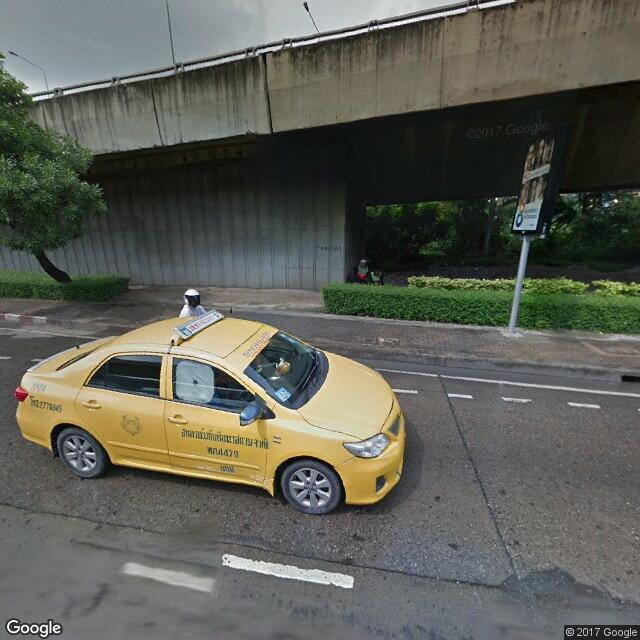

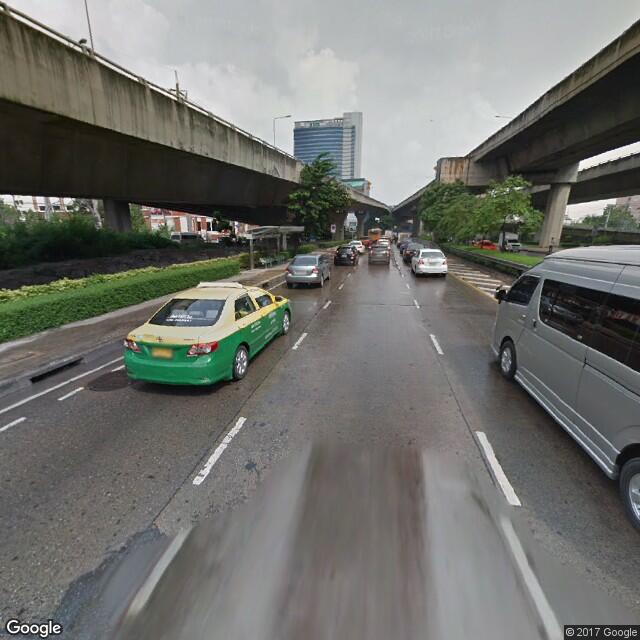

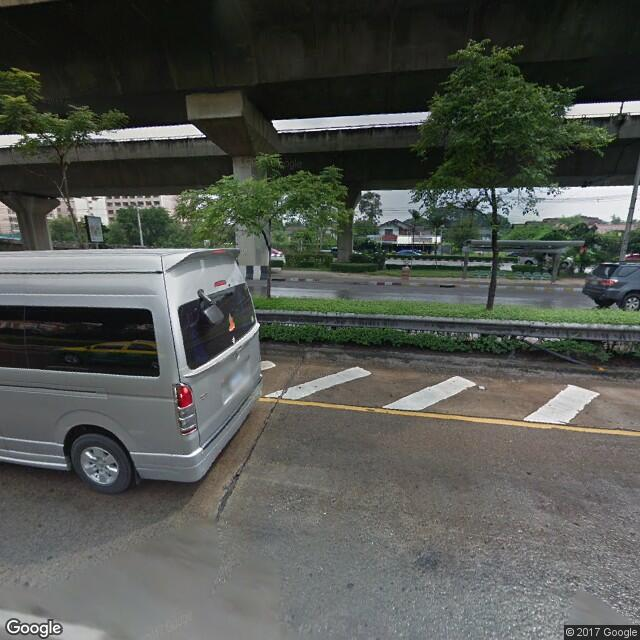

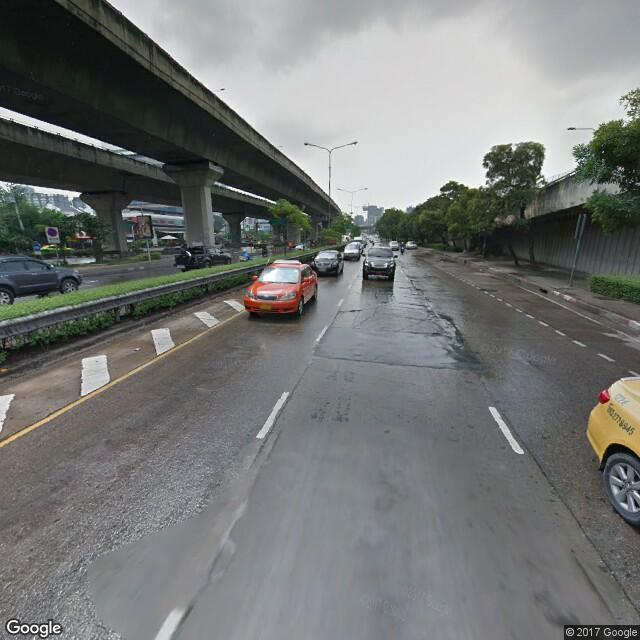

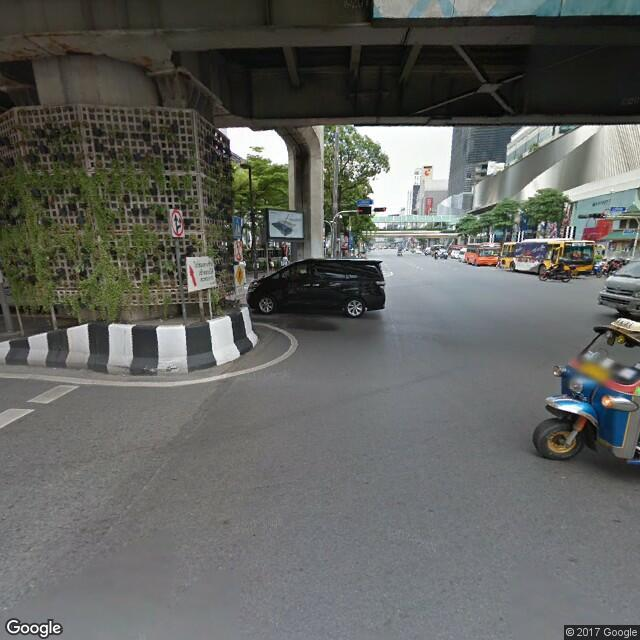

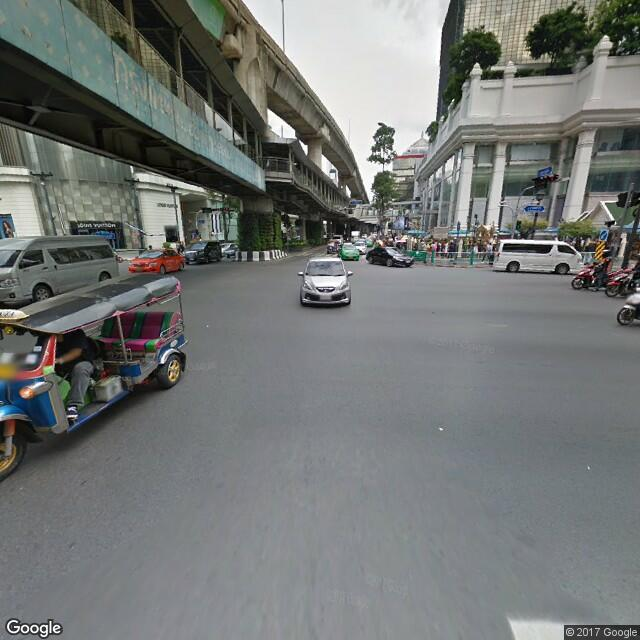

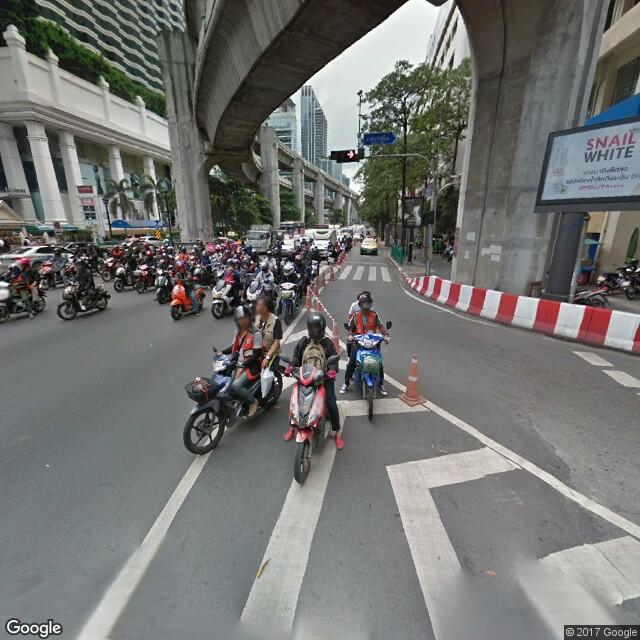

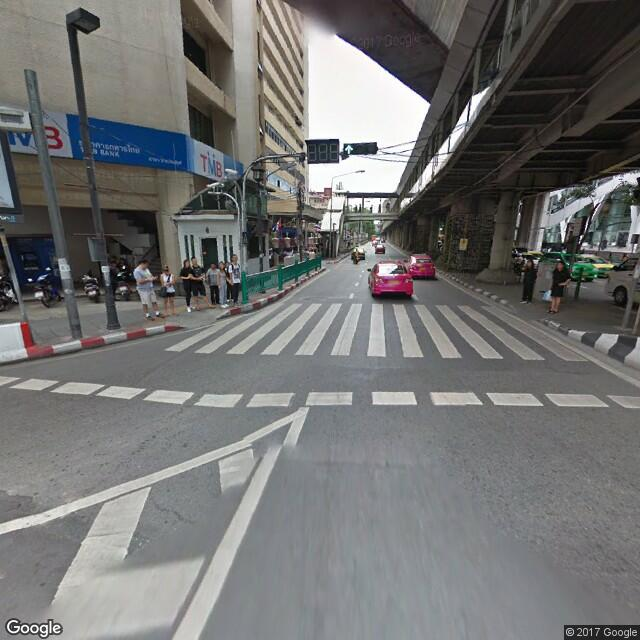

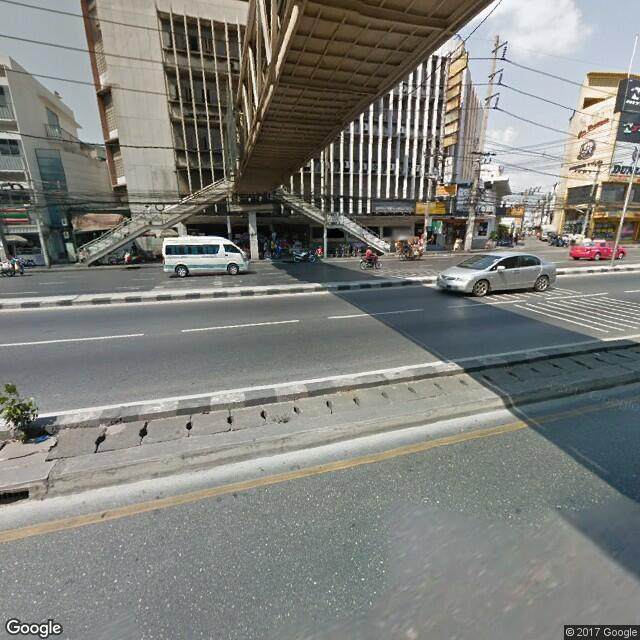

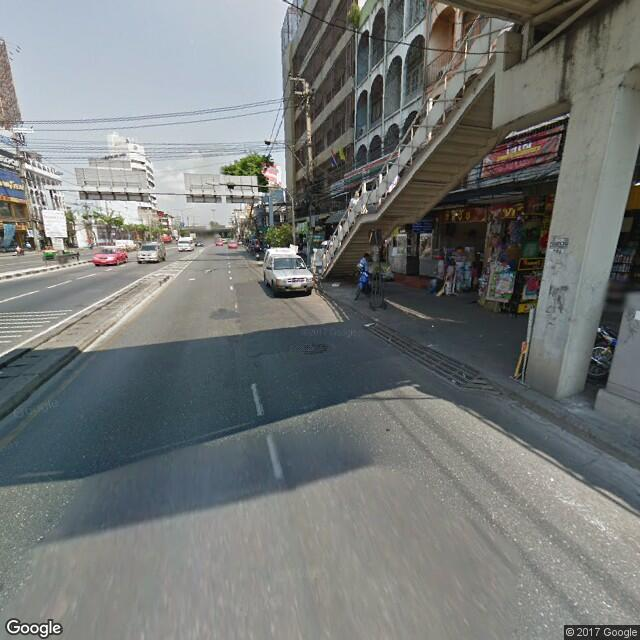

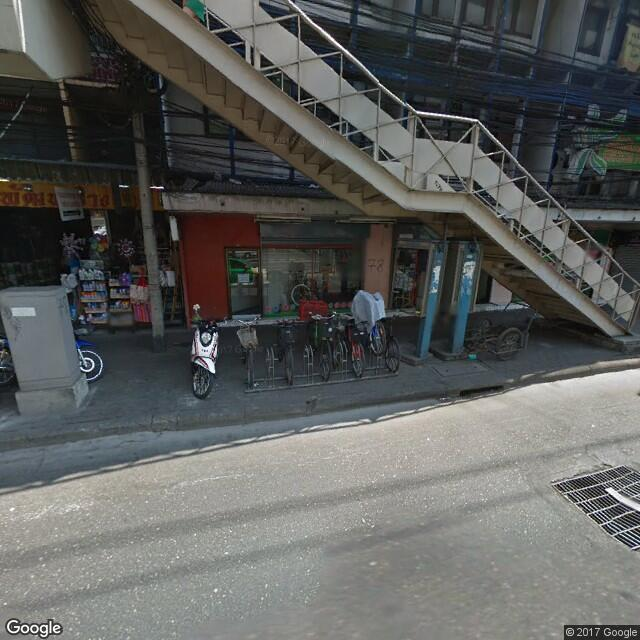

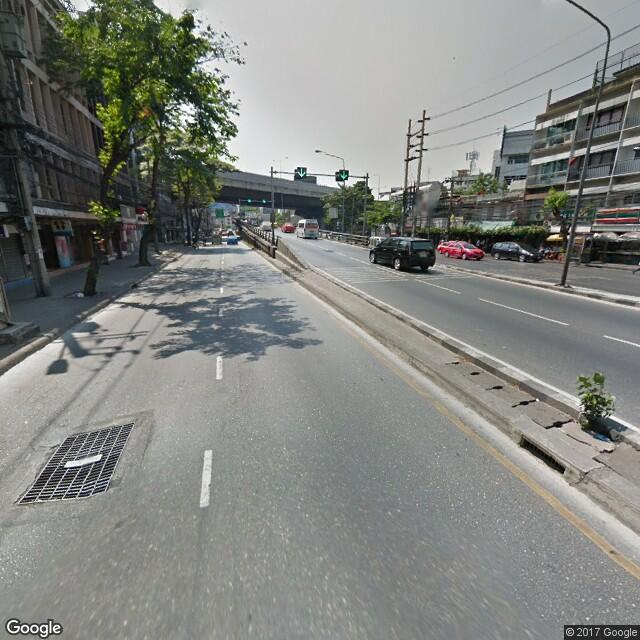

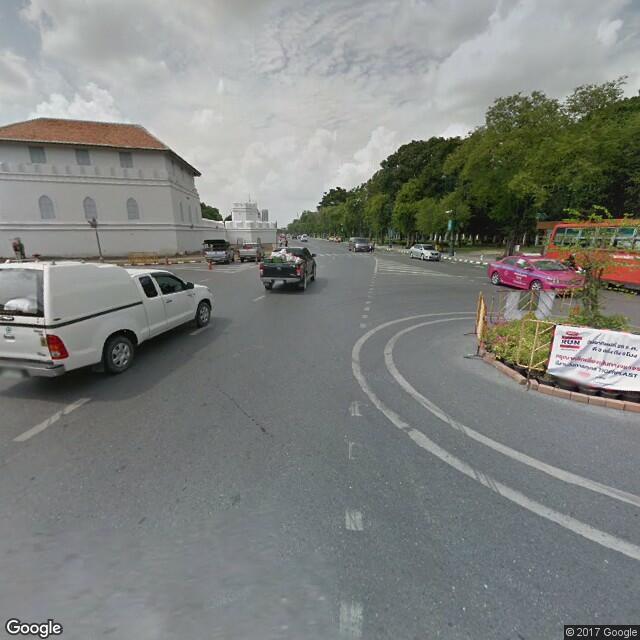

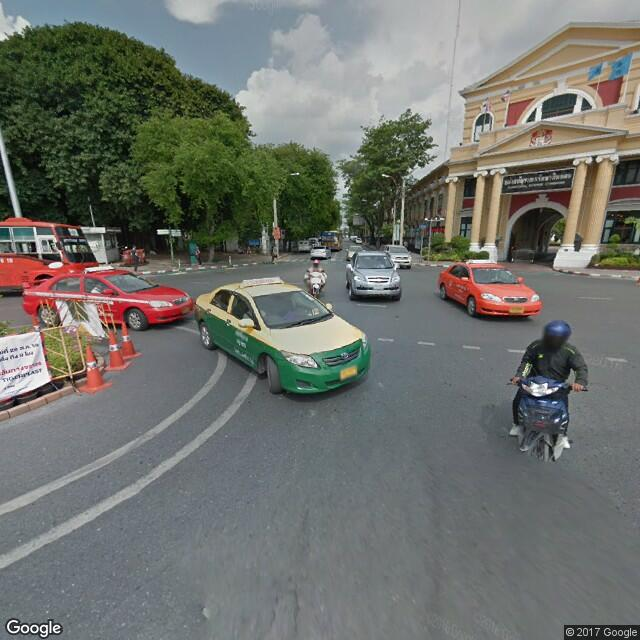

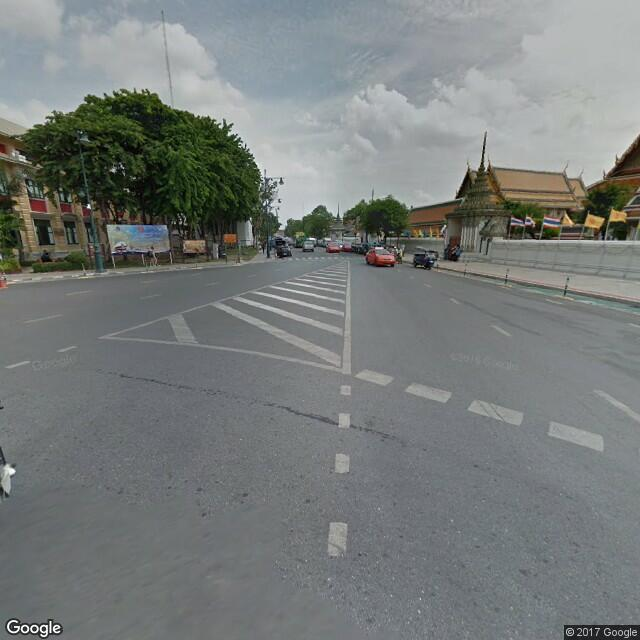

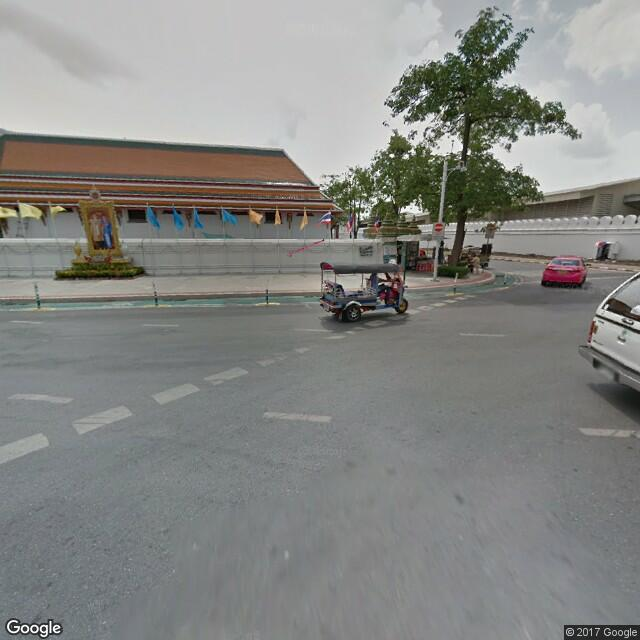

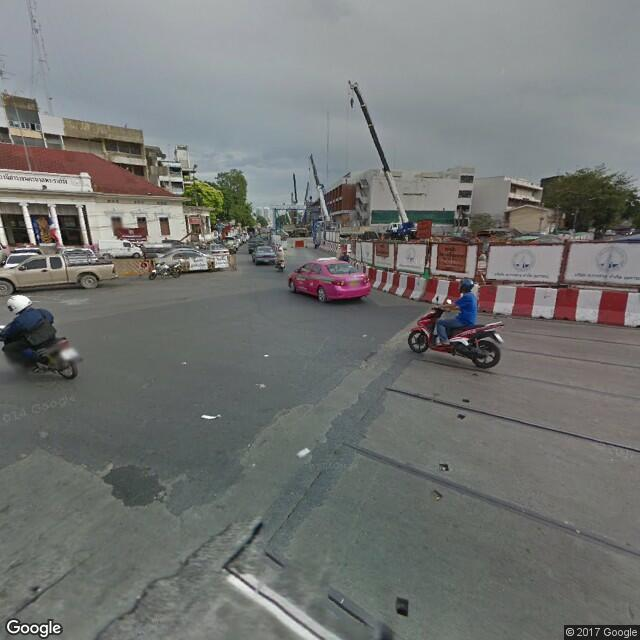

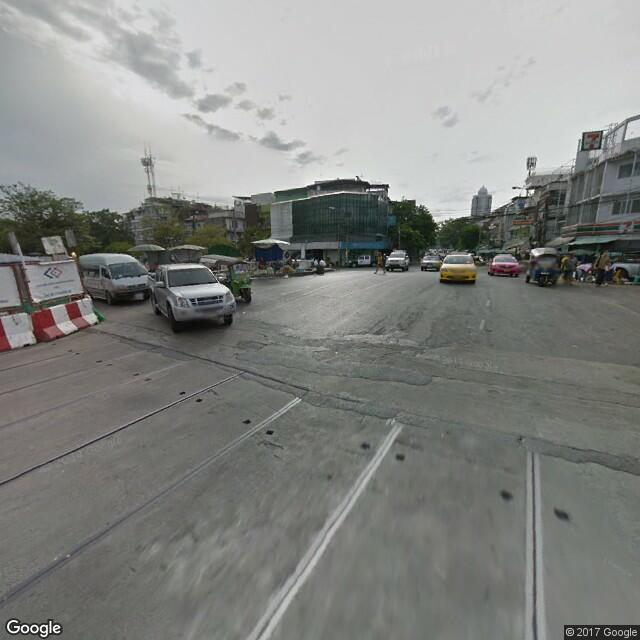

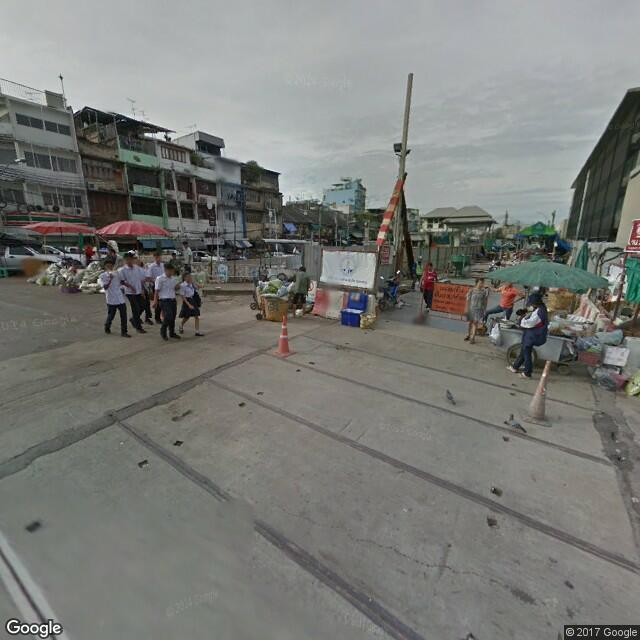

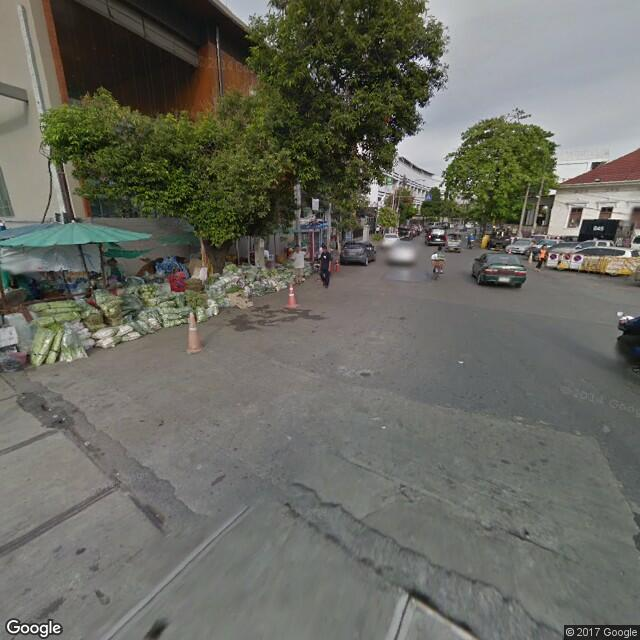

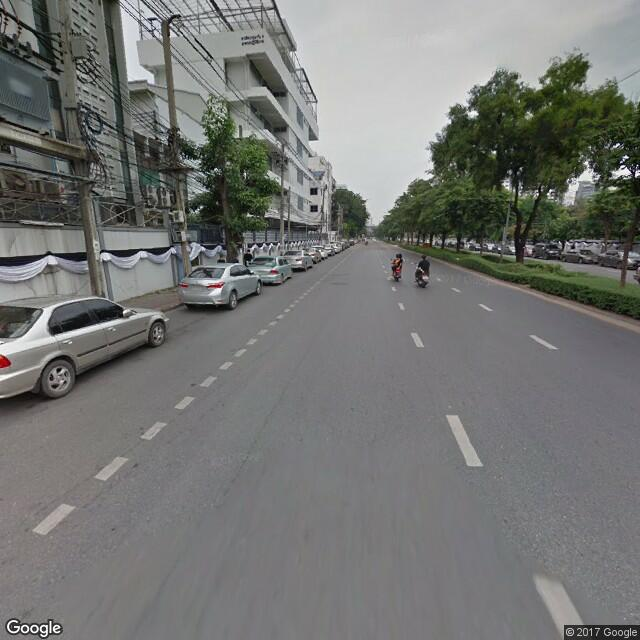

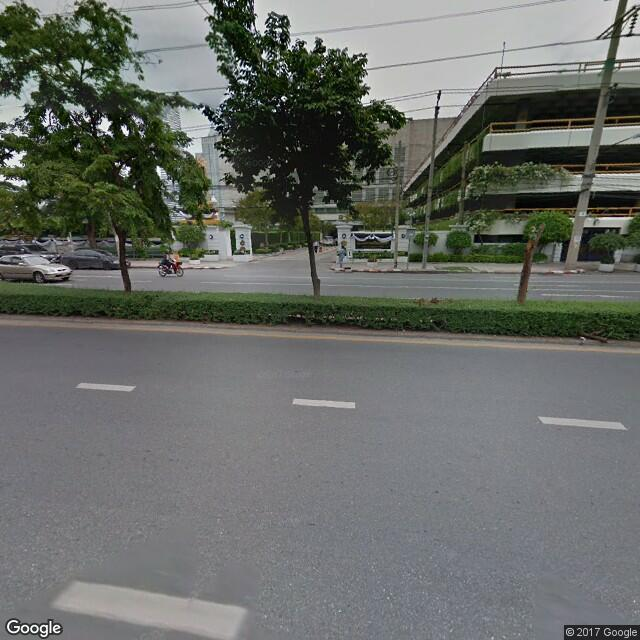

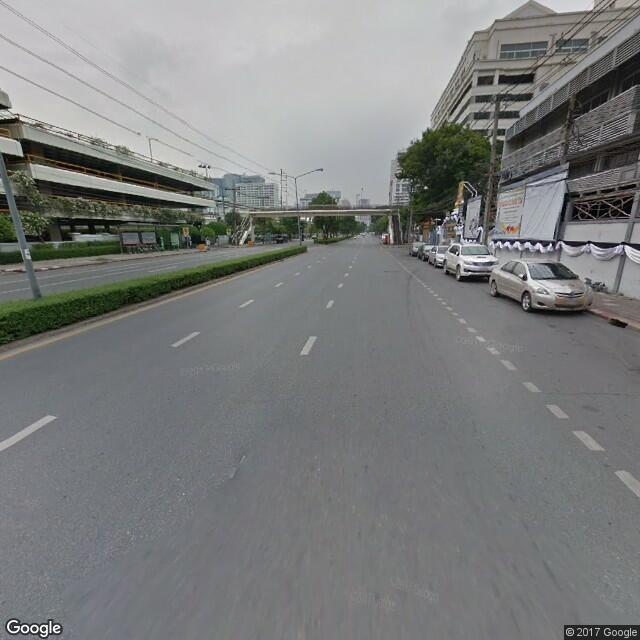

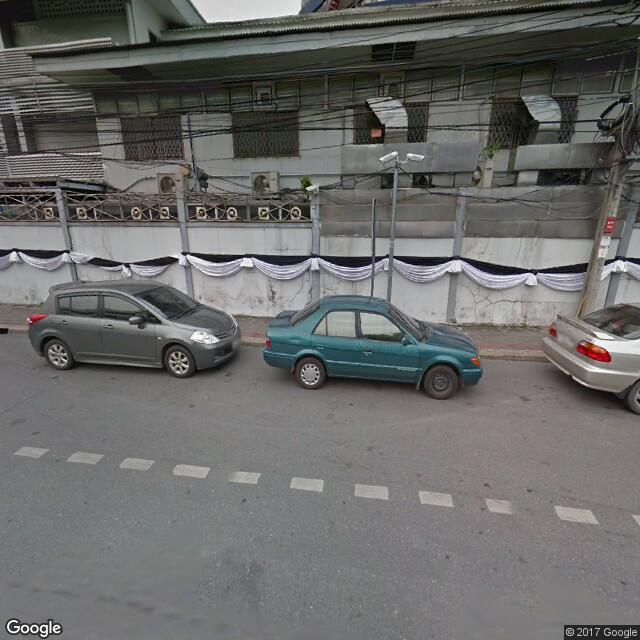

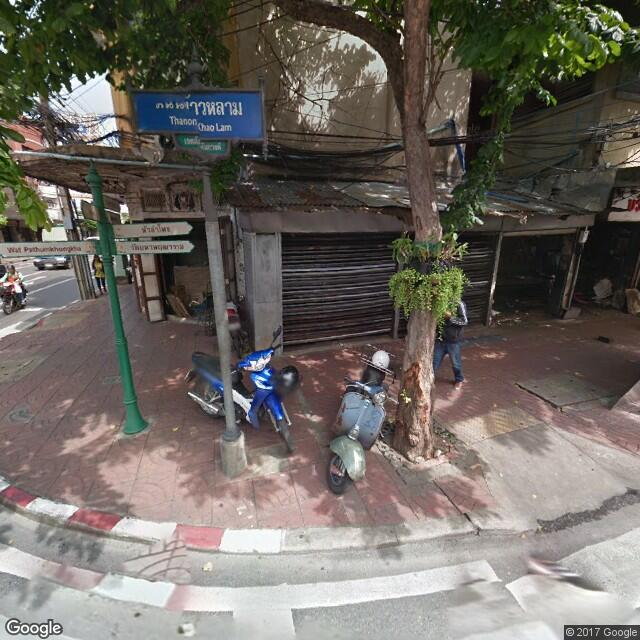

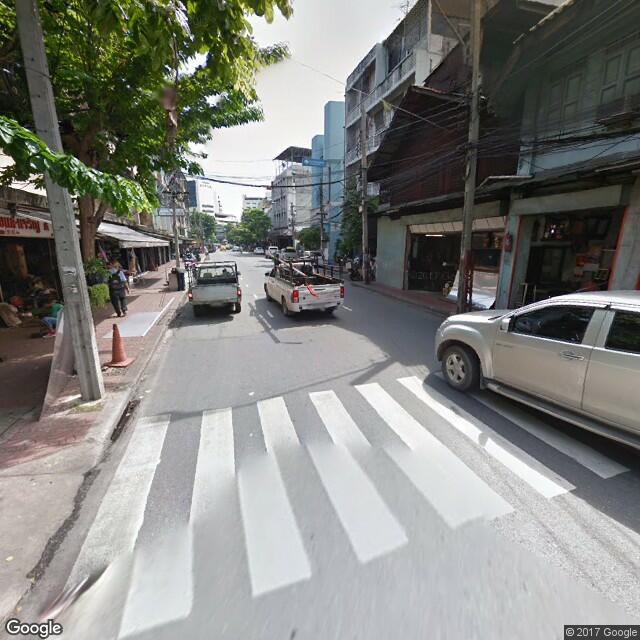

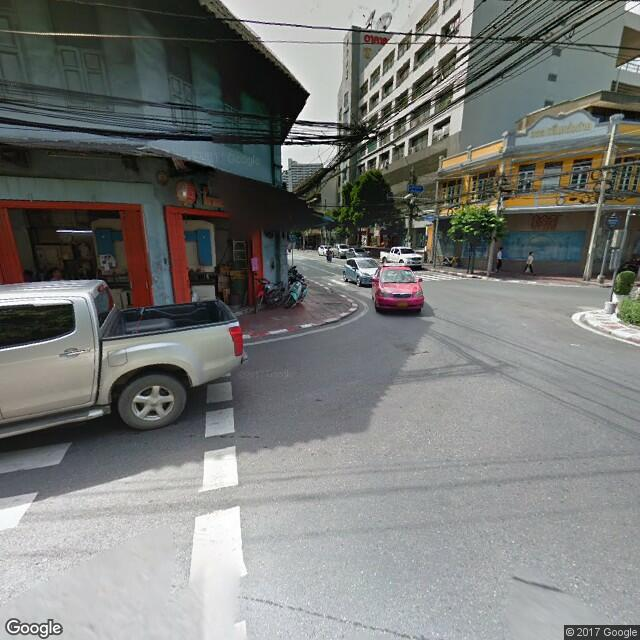

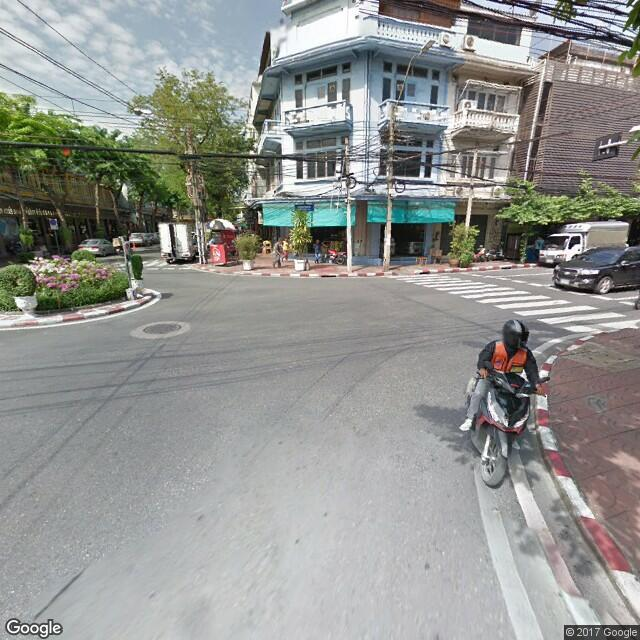

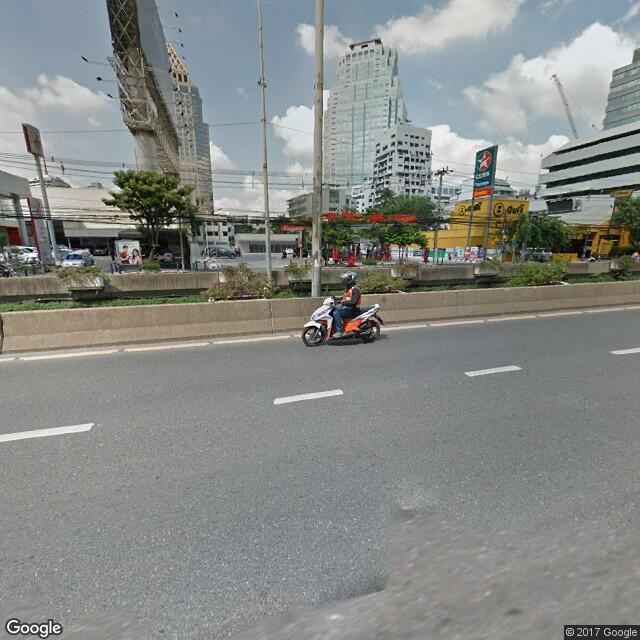

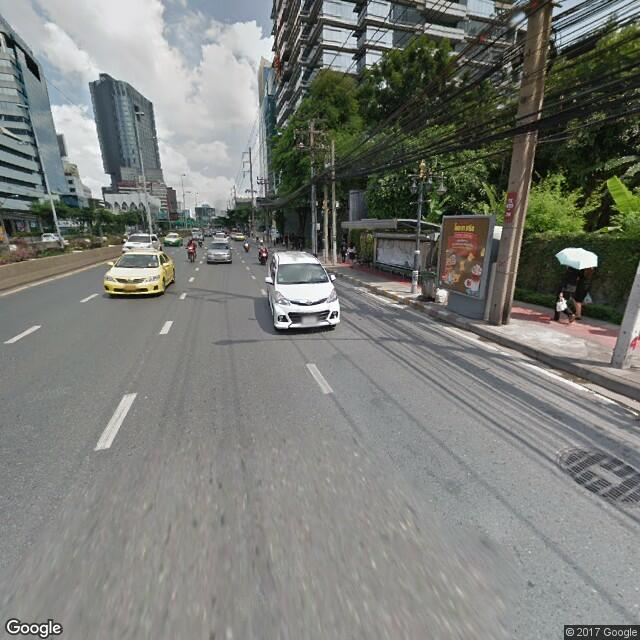

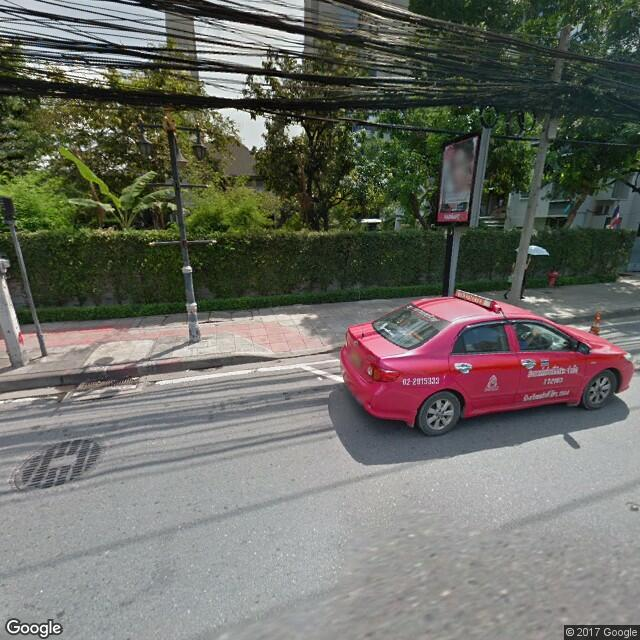

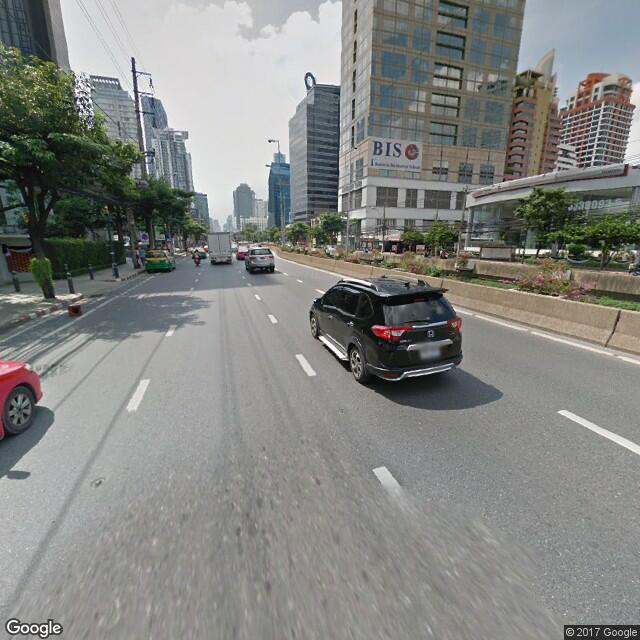

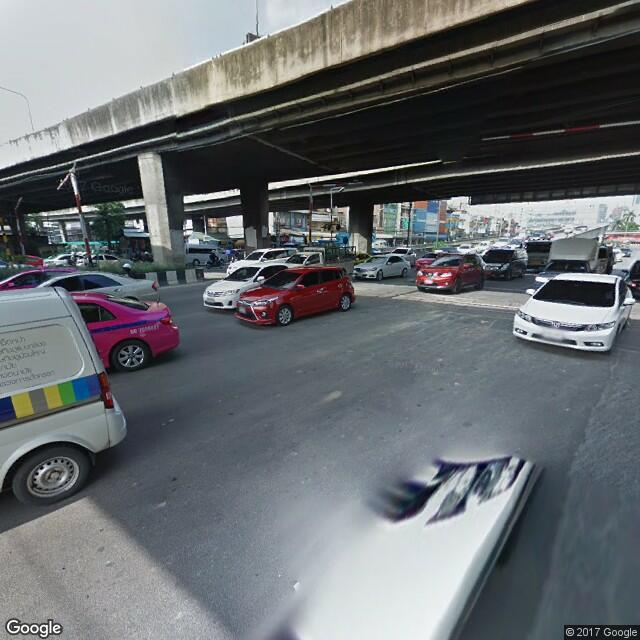

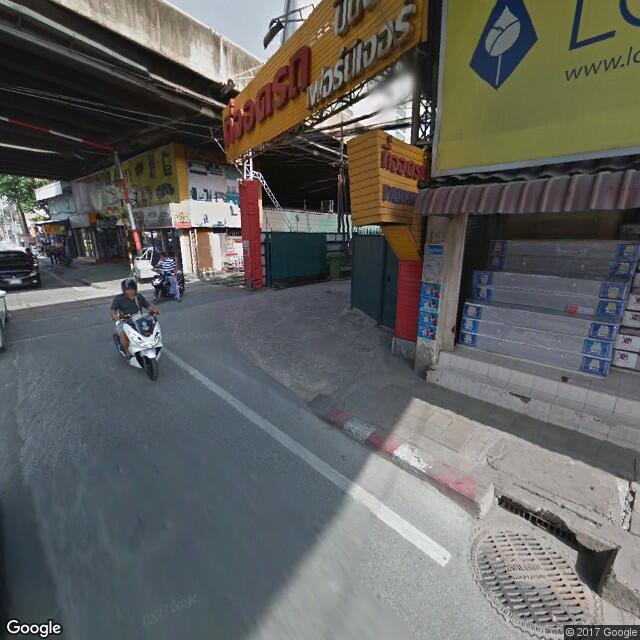

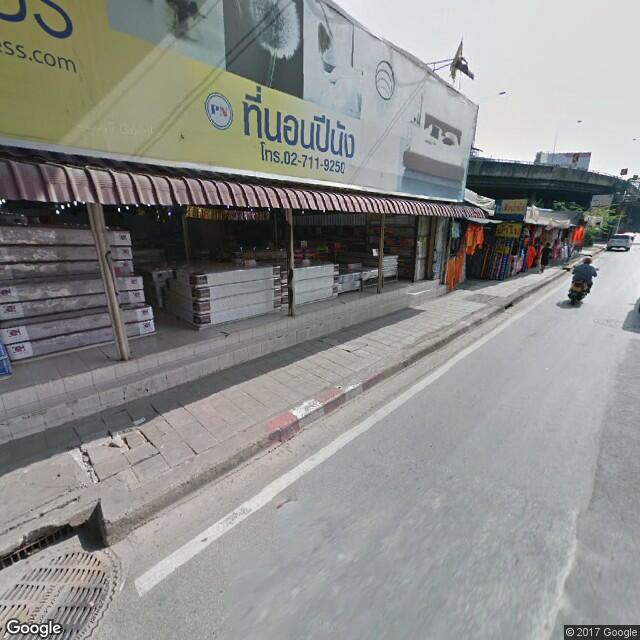

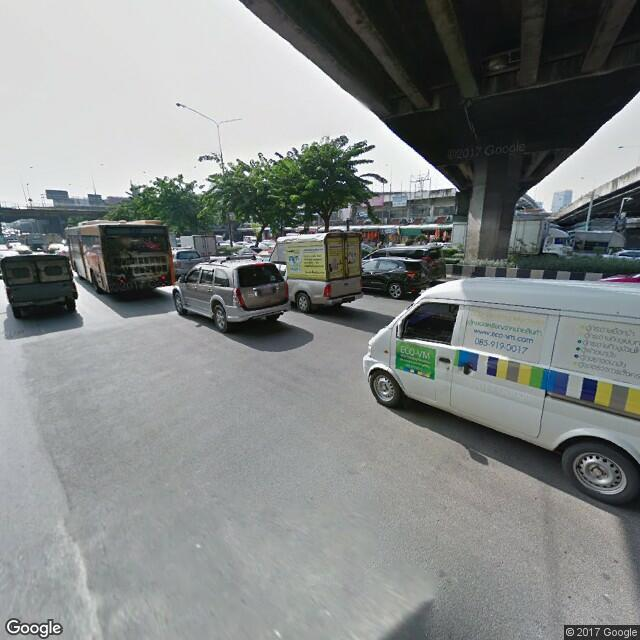

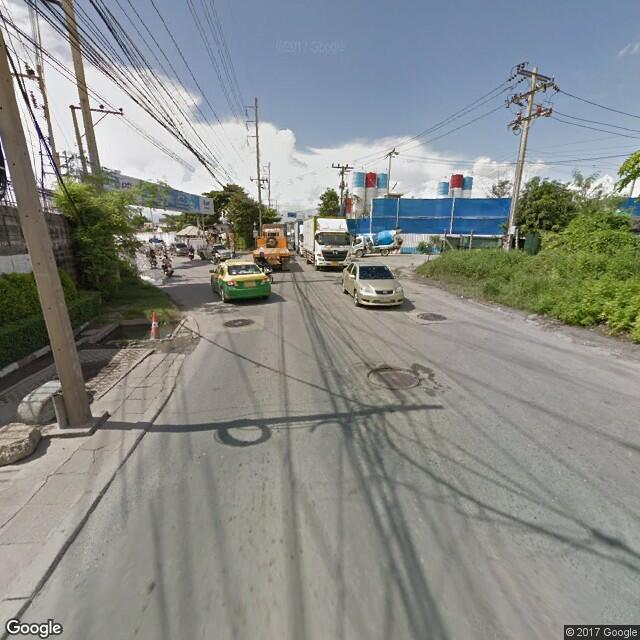

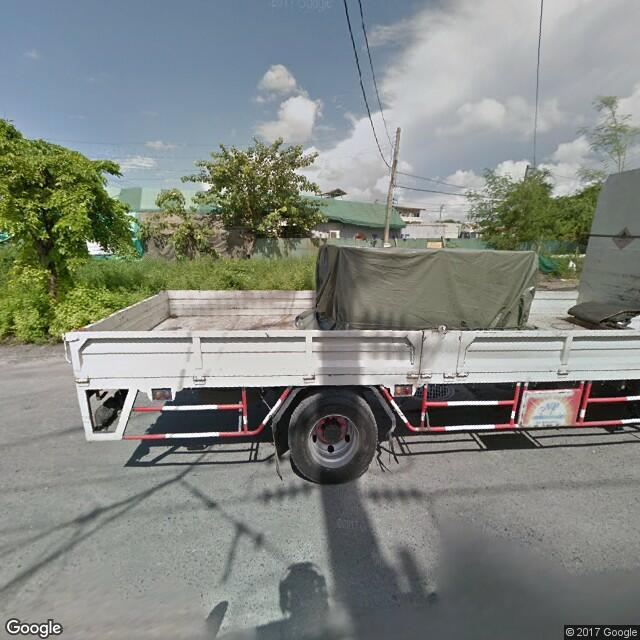

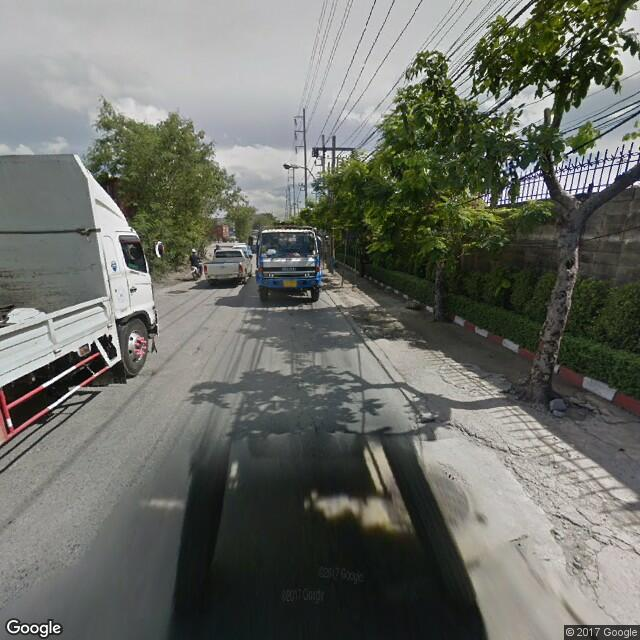

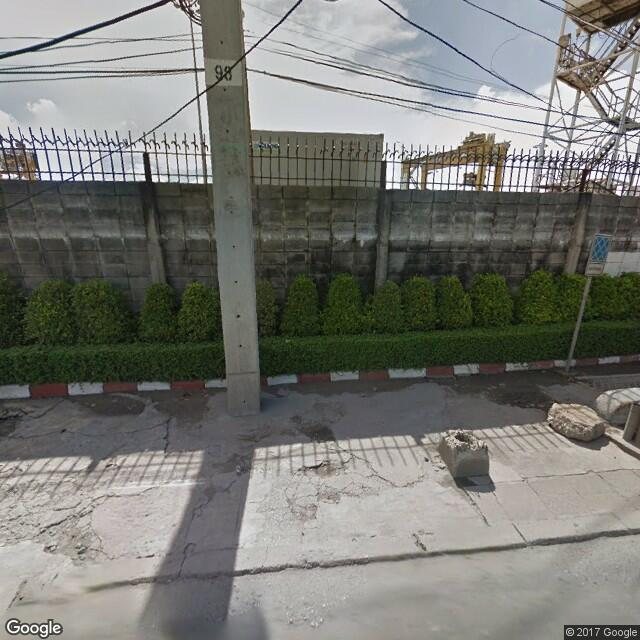

In [22]:
#from ipywidgets import Image
from IPython.display import Image
from IPython.display import display

imgs = ['img0', 'img90', 'img180', 'img270']
images = []
for row in df[imgs].itertuples(index=False):
    for i in xrange(len(imgs)):
        img = Image(data=b64decode(row[i]), width="640px")
        images.append(img)

display(*images[:10*4])

## Subplot

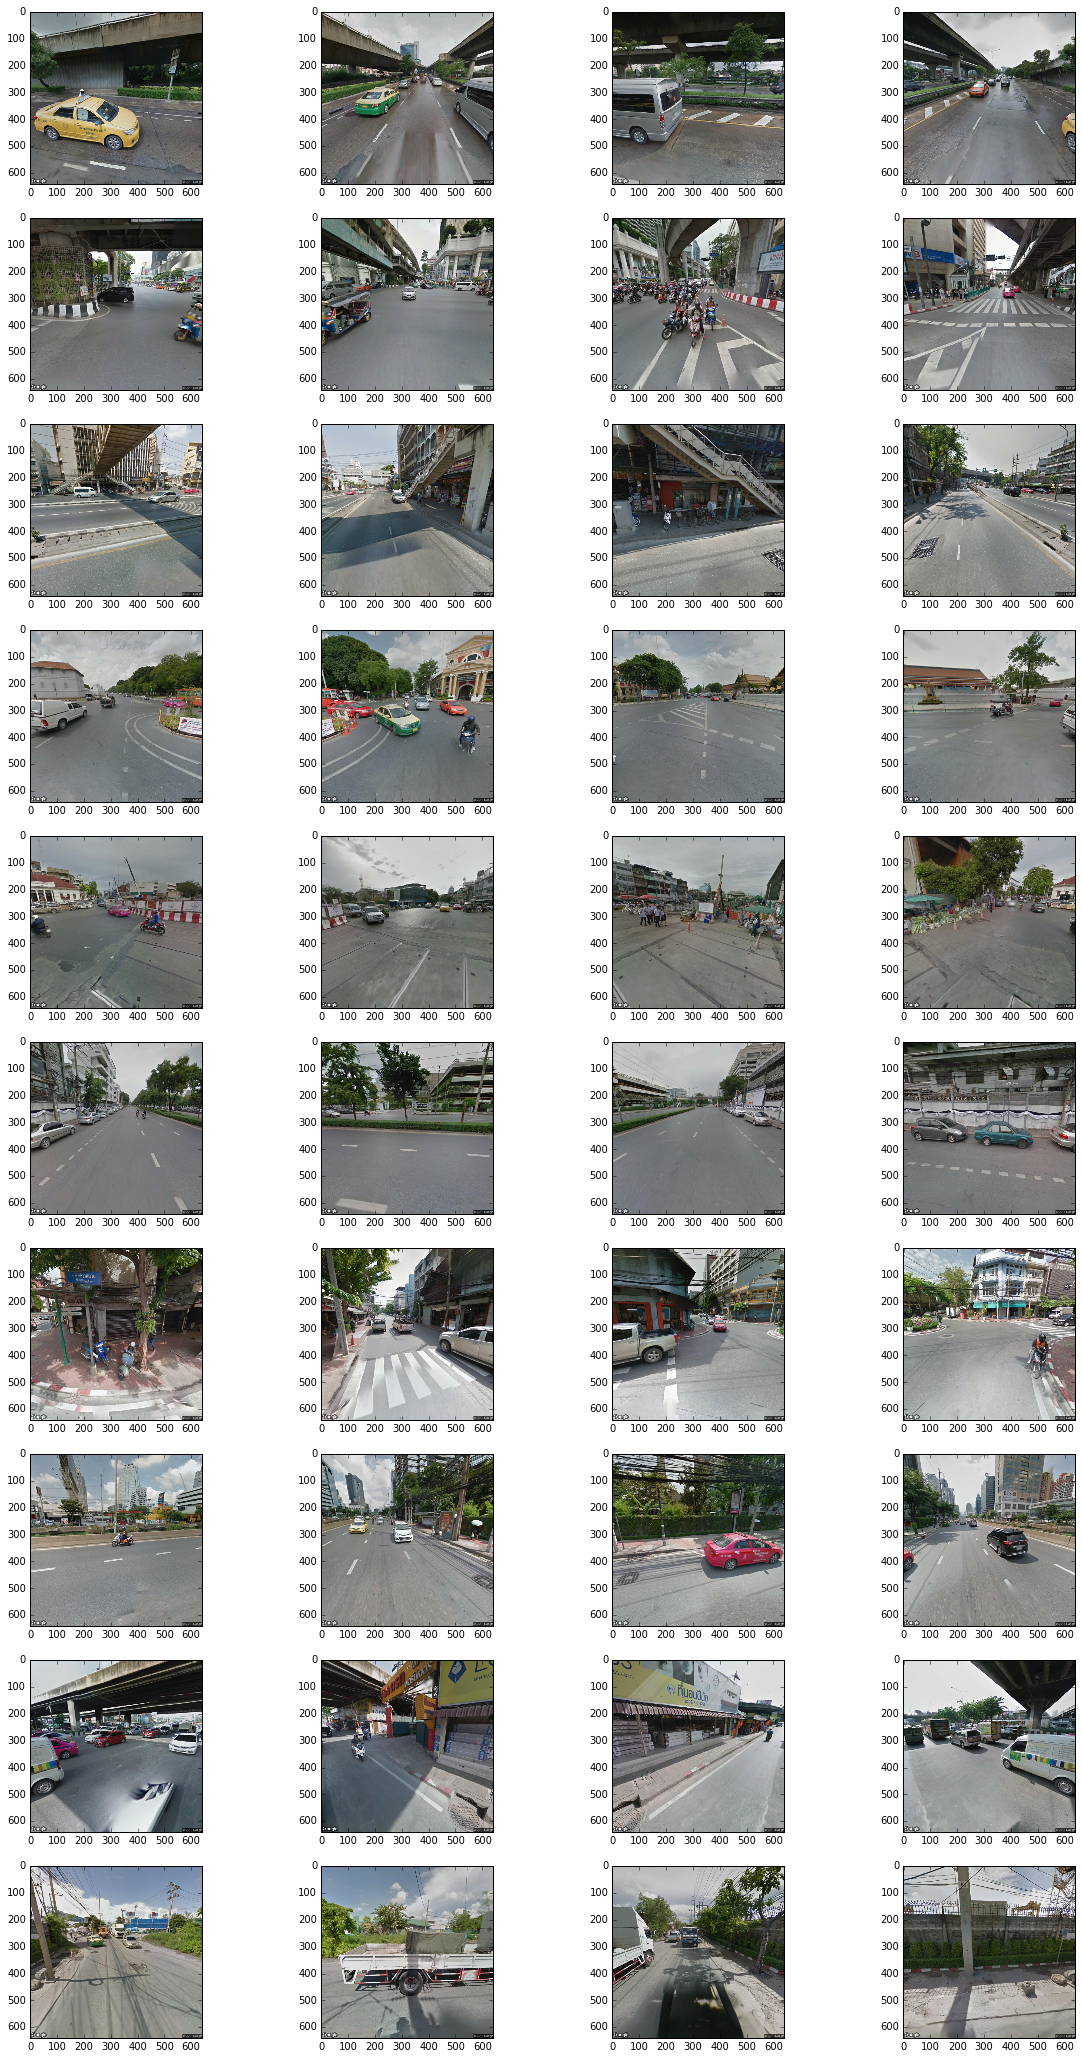

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image as PILImage
from cStringIO import StringIO

plotimages = images[:4*10]
plt.figure(figsize=(20, 40))
columns = 4
for i, image in enumerate(plotimages):
    plt.subplot(len(plotimages) / columns + 1, columns, i + 1)
    img = PILImage.open(StringIO(image.data))
    plt.imshow(img)


## Export Data for Mturk

In [52]:
df.to_csv('bangkok-roads-gsv.csv.gz', index_label='id', encoding='utf-8', compression='gzip')

In [66]:
def export_image_to_file(i, data, basename):
    url = '{0:s}{1:04d}.jpg'.format(basename, i)
    with open('mturk/' + url, 'wb') as f:
        raw = b64decode(data)
        f.write(raw)
    return url

In [61]:
rdf = pd.read_csv('bangkok-roads-gsv.csv.gz')

In [67]:
rdf['url_img0'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img0, 'bangkok/img0_'), axis=1)
rdf['url_img90'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img90, 'bangkok/img90_'), axis=1)
rdf['url_img180'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img180, 'bangkok/img180_'), axis=1)
rdf['url_img270'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img270, 'bangkok/img270_'), axis=1)

In [72]:
del rdf['img0']
del rdf['img90']
del rdf['img180']
del rdf['img270']
rdf.to_csv('mturk/bangkok.csv', index=False)